# **<center><span style= "color:#C25A7C;">Heart Disease Project</span></center>**

## ***<span style= "color:purple;">Imports </span>***

In [ ]:
#imports

# to handle the data
import numpy as np
import pandas as pd

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# for iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the dataset
df = pd.read_csv('data/heart_disease_uci.csv')
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


## ***<span style= "color:#2E8B57;">Exploratory data analysis </span>***

### ***<span style= "color:#667C26;">Explore each column </span>***

##### ***<span style= "color:#FF8C00;">Data and sex column </span>***

In [3]:
# exloring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.shape

(920, 16)

In [5]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [6]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

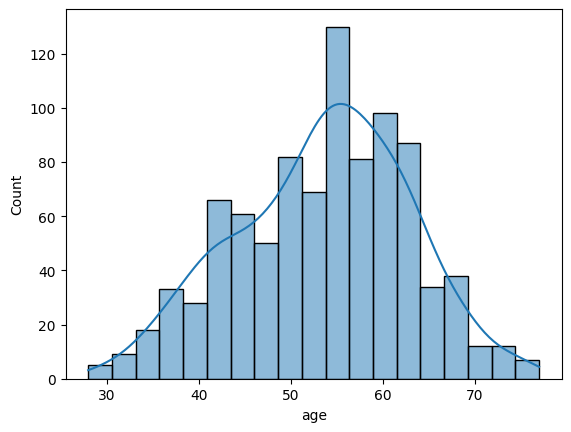

In [7]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)
plt.show()

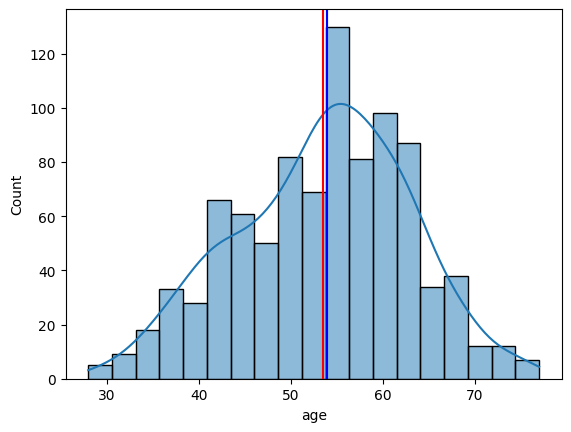

In [8]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color ='red')
plt.axvline(df['age'].median(), color ='green')
plt.axvline(df['age'].mode()[0], color ='blue')
plt.show()

In [9]:
# lets explore the gender based distribution of the dataset for age column.
# plot the histrogram of age column using plotly and coloring this by sex column.

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [ ]:
# display some statistics 
df.groupby('sex')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,194.0,52.474227,9.496214,30.0,46.0,53.0,60.0,76.0
Male,726.0,53.787879,9.392685,28.0,47.0,55.0,60.0,77.0


In [13]:
# find the value of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [16]:
# calculate the percentage of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count+female_count

# calculate percentages 
male_percentage = (male_count/total_count)*100
female_percentage = (female_count/total_count)*100

# Calculate how many times male percentage is more than female percentage
times_more = male_percentage / female_percentage

# display the results
print(f"Male percentage in data : {male_percentage:.2f}%")
print(f"Female percentage in data : {female_percentage:.2f}%")
print(f"Male percentage is {times_more:.2f} times more than female percentage.")

Male percentage in data : 78.91%
Female percentage in data : 21.09%
Male percentage is 3.74 times more than female percentage.


In [12]:
# find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()


sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

##### ***<span style= "color:#FF8C00;">Dataset column </span>***

In [ ]:
# lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [18]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

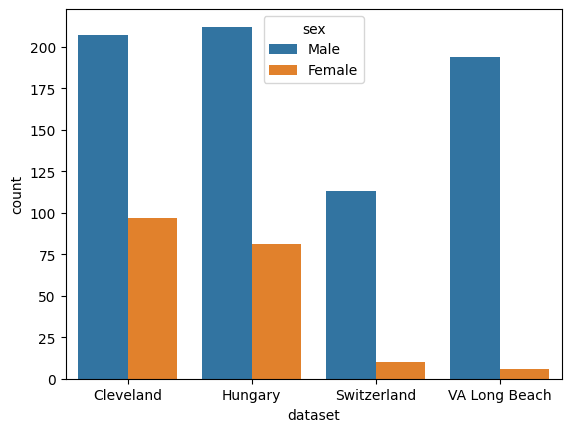

In [21]:
# finding the countplot of dataset column
sns.countplot(data=df, x='dataset', hue='sex')

# make a count plot using plotly
fig = px.bar(data_frame=df, x='dataset', color='sex')
fig.show()

In [22]:
# print the value count of dataset column groupby sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [23]:
# make a plot of age column and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age',color='dataset')
fig.show()


In [27]:
# print the mean, median and mode of the dataset
print(f"mean of the dataset : {df.groupby('dataset')['age'].mean()}")
print("----------------------------")
print(f"median of the dataset : {df.groupby('dataset')['age'].median()}")
print("----------------------------")
print(f"mode of the dataset : {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

mean of the dataset : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------
median of the dataset : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------
mode of the dataset : dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [28]:
df.groupby('dataset')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
Cleveland,304.0,54.351974,9.150256,28.0,47.75,55.5,61.0,77.0
Hungary,293.0,47.894198,7.738385,29.0,42.00,49.0,54.0,66.0
Switzerland,123.0,55.317073,9.032108,32.0,51.00,56.0,61.5,74.0
VA Long Beach,200.0,59.350000,7.811697,35.0,55.00,60.0,64.0,77.0


##### ***<span style= "color:#FF8C00;">chest pain column </span>***

In [29]:
# lets explore the cp column

# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

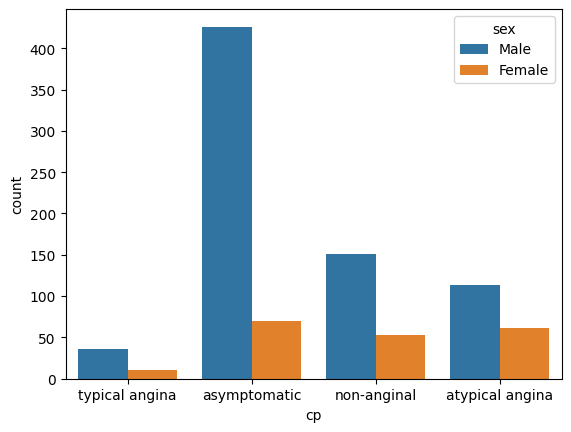

In [34]:
# ploting count plot of cp column by sex column
sns.countplot(data=df, x='cp', hue='sex')
plt.show()

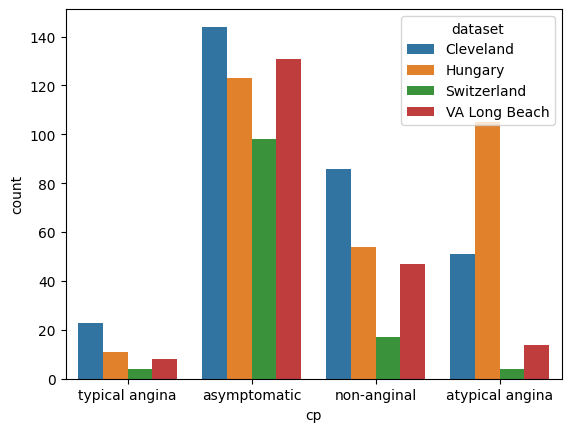

In [35]:
# ploting count plot of cp column by dataset column
sns.countplot(data=df, x='cp', hue='dataset')
plt.show()

In [31]:
# draw the plot of age column groupby by cp column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

##### ***<span style= "color:#FF8C00;">trestbps column </span>***

In [48]:
# lets explore the trestbps (resting blood pressure) column
# the normal resting blood pressure is 120/80 mm Hg.

# find the value count of trestbps column
# df.describe().T

df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

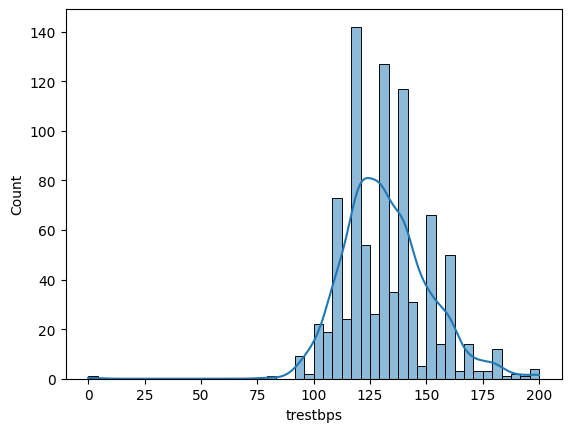

In [50]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)
plt.show()

### ***<span style= "color:#667C26;">Handling missing values</span>***

##### ***<span style= "color:#FF8C00;">Deal with missing values for float columns </span>***

In [52]:
# find the percentage of missing values in trestbps column
print(f"Percentage of missing values in trestbps column is: {df['trestbps'].isnull().sum() / len(df)*100:.2f}%")

Percentage of missing values in trestbps column is: 6.41%


In [55]:
# imputing the missing values in trestbps with iterative imputer

# creating an object of iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer on trestbps column
imputer.fit(df[['trestbps']])
# transform the data
df['trestbps'] = imputer.transform(df[['trestbps']])

# check the missing values in trestbps
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


In [59]:
# lets impute other columns 

# first check their missing percentage 
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [60]:
# sperate the numaric cols and objects to impute

# impute missing values of float columns
imputer2 = IterativeImputer(max_iter=10, random_state=42)

# fit transform the columns (ca, oldpeak, thalch, chol)
df[['ca','oldpeak','thalch','chol']] = imputer2.fit_transform(df[['ca','oldpeak','thalch','chol']])

In [65]:
# now the object columns (thal, slop, fbs, exang,restecg)

# check the thal column for impute with mean,median or mode
df['thal'].value_counts()

# can't use mean, median mode for this have to use some machine learning model

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

##### ***<span style= "color:#FF8C00;">Deal with missing values for object columns using ml model </span>***

In [66]:
# checking the missing values all columns
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [67]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [70]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [71]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 67.39 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 77.46 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.85 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [76]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### ***<span style= "color:#667C26;">Handling outliers</span>***

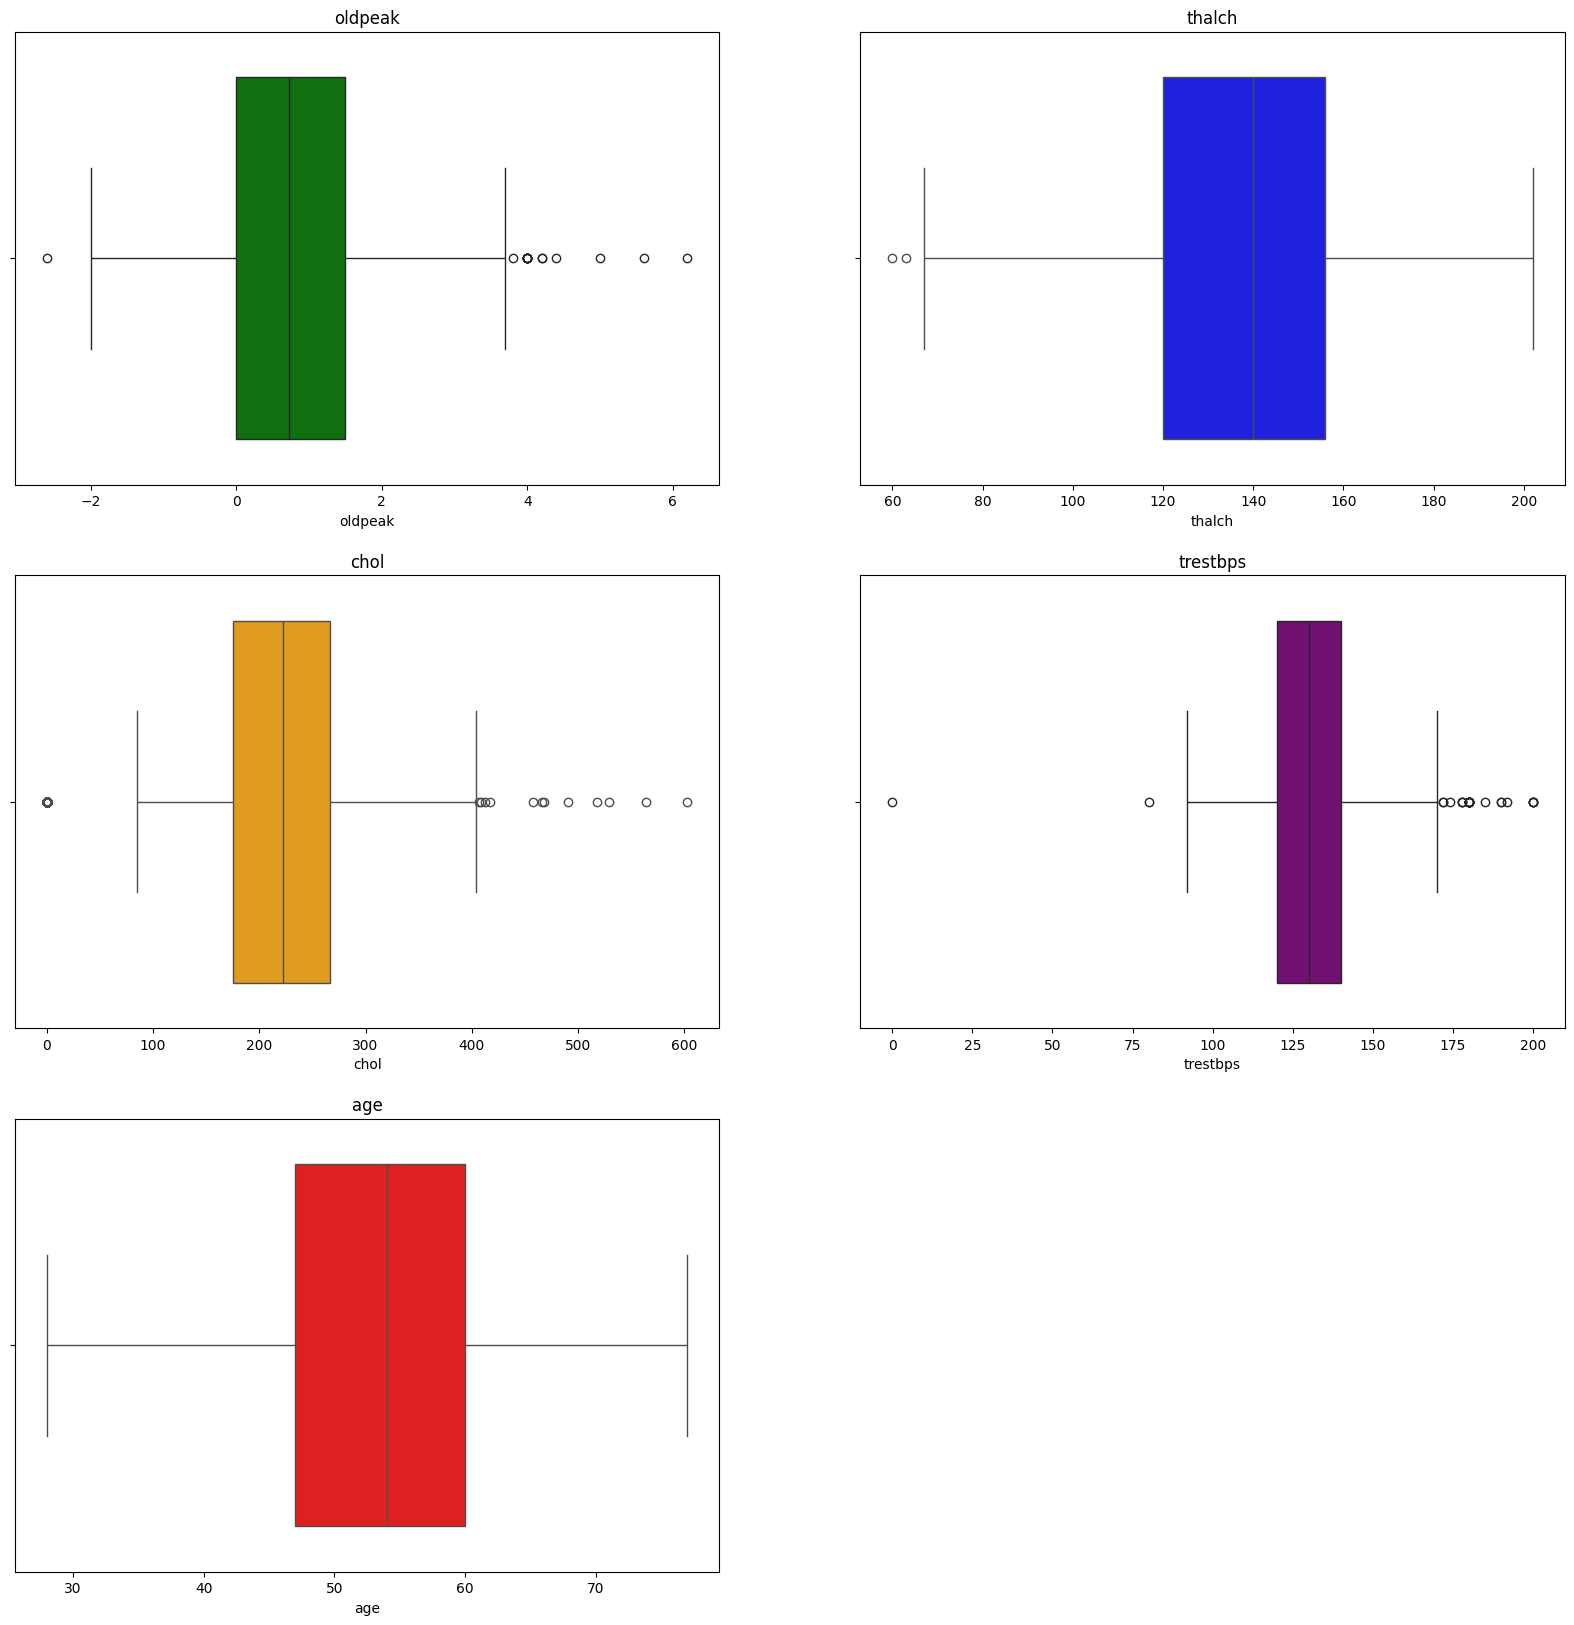

In [78]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20,20))
colors = ['red','green','blue','orange','purple']

for idx, col in enumerate(numeric_cols, start=1):  # Correctly unpack index and column name
    plt.subplot((len(numeric_cols) // 2) + 1, 2, idx)  # Create subplot
    sns.boxplot(x=df[col], color=colors[idx % len(colors)])  # Assign color
    plt.title(col) 

In [79]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [80]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [82]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


## ***<span style= "color:#2E8B57;">Machine learning model </span>***

In [83]:
df['num'].value_counts()


num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

- 0 = no heart disease
- 1 = mild heart disease
- 2 = moderate heart disease 
- 3 = severe heart disease
- 4 = critical heart disease 

In [87]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

In [88]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6500968992248062
Test Accuracy: 0.6376811594202898

Model: Gradient Boosting
Cross-validation Accuracy: 0.6282945736434108
Test Accuracy: 0.644927536231884

Model: Support Vector Machine
Cross-validation Accuracy: 0.5754602713178294
Test Accuracy: 0.5869565217391305

Model: Logistic Regression
Cross-validation Accuracy: 0.5178173449612403
Test Accuracy: 0.5036231884057971

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5738977713178295
Test Accuracy: 0.5978260869565217

Model: Decision Tree
Cross-validation Accuracy: 0.5848110465116279
Test Accuracy: 0.5978260869565217

Model: Ada Boost
Cross-validation Accuracy: 0.63140746124031
Test Accuracy: 0.6231884057971014

Model: XG Boost
Cross-validation Accuracy: 0.6142562984496124
Test Accuracy: 0.6413043478260869

Model: Naive Bayes
Cross-validation Accuracy: 0.580171996124031
Test Accuracy: 0.5471014492753623

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_

#### outputs:
1. the minimun age to have a heart disease starts from 28 years old.
2. most of the people got heart diease at the age of 53-54 years
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91%
5. Female Percentage in the data: 21.09%
6. Males are 274.23% more than females in the data.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
    A. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
    B. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).
8. Write down the observations here about mean, median and mode of age column, grouped by dataset column.
9. Write down the observation from cp column here.
10. Write down the steps of Imputing missingvalues and why did you choose those steps?
11. How did you deal with outliers, write the information Step by Step.
12. Explore all other columns and write their outputs.
13. write down the observations from model output.